# Análisis de desviación típica entre precio medio real y predicho

### Importación de librerías

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

### Importación de dataset

In [34]:
df = pd.read_csv('../data/processed/viviendas_2011_2024_nodrop.csv')

### Generación de gráficas

GRÁFICA DE PRECIO MEDIO REAL DE VENTAS

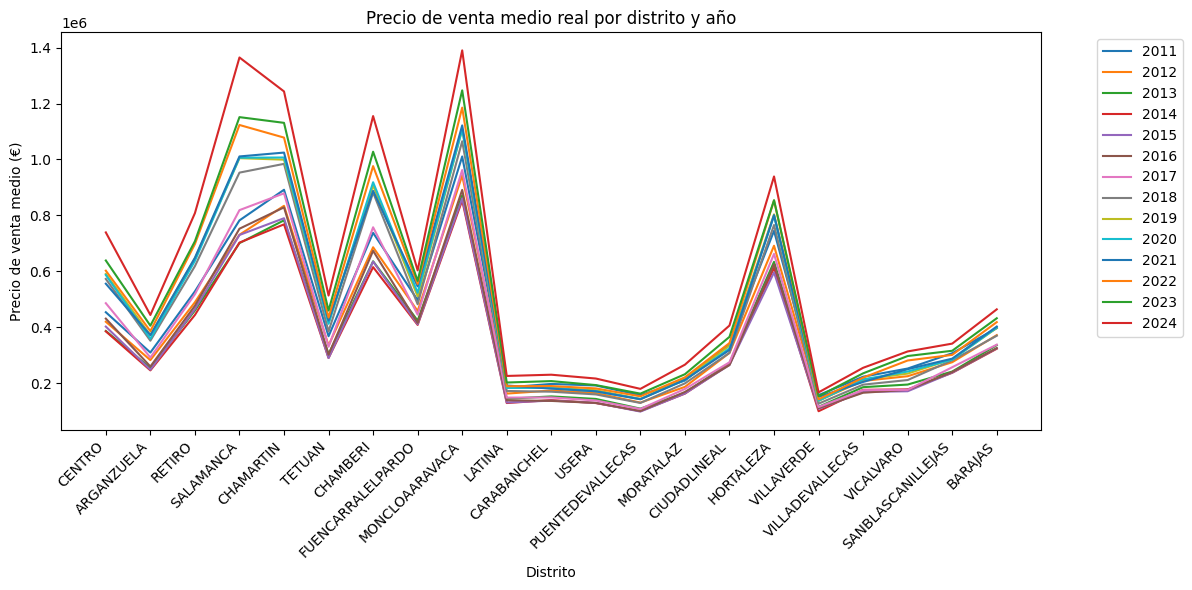

In [35]:
plt.figure(figsize=(12, 6))

# Calcular precio medio por distrito y año para ventas
mean_prices_real = df[df['Operacion'] == 'venta'].groupby(['Ano', 'Distrito'], as_index=False).agg(
    Precio_total=pd.NamedAgg(column='Precio_venta', aggfunc=lambda x: (x * df.loc[x.index, 'Tamano']).mean())
)

distritos = df['Distrito'].unique()

for year in mean_prices_real['Ano'].unique():
    year_data = mean_prices_real[mean_prices_real['Ano'] == year]
    # Ordenar por distrito
    year_data = year_data.set_index('Distrito').reindex(distritos).reset_index()
    plt.plot(year_data['Distrito'], year_data['Precio_total'], label=str(year))

plt.xticks(rotation=45, ha='right')
plt.xlabel('Distrito')
plt.ylabel('Precio de venta medio (€)')
plt.title('Precio de venta medio real por distrito y año')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../reports/figures/precio_venta_real.png', dpi=300)
plt.show()

GRÁFICA DE PRECIO MEDIO PREDICHO DE VENTAS

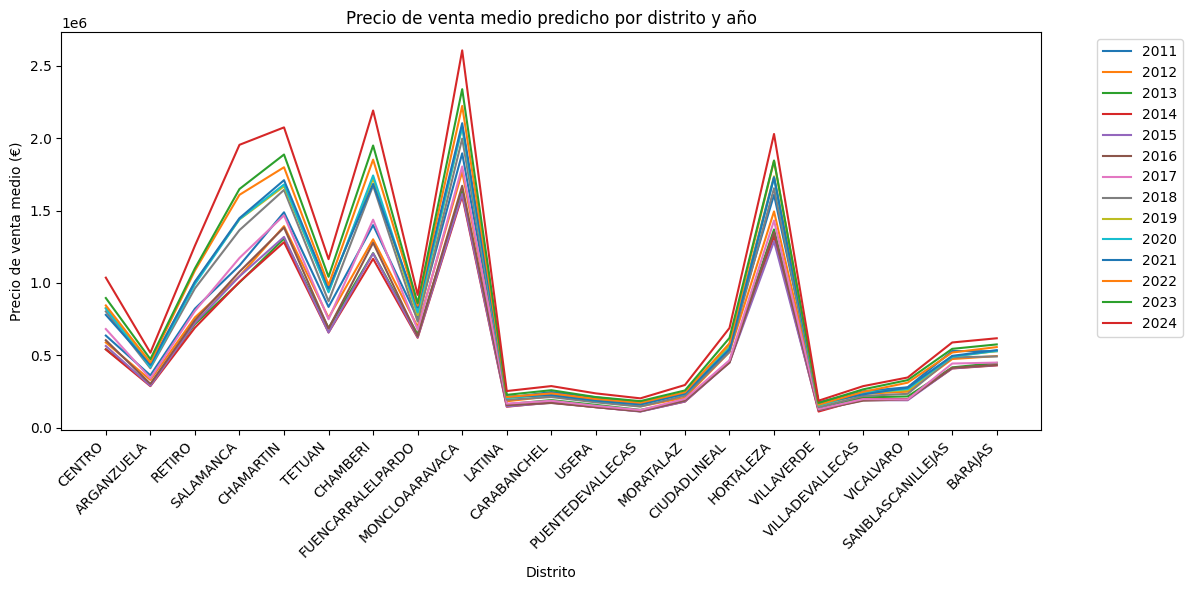

In [36]:
plt.figure(figsize=(12, 6))

# Get unique districts in a fixed order
distritos = df['Distrito'].unique()

# Calculate mean predicted prices by district and year for sales
mean_prices = df[df['Operacion'] == 'venta'].groupby(['Ano', 'Distrito'])['Precio_predicho'].mean().reset_index()

for year in mean_prices['Ano'].unique():
    year_data = mean_prices[mean_prices['Ano'] == year]
    # Sort the data by distrito to maintain consistent order
    year_data = year_data.set_index('Distrito').reindex(distritos).reset_index()
    plt.plot(year_data['Distrito'], year_data['Precio_predicho'], label=str(year))

plt.xticks(rotation=45, ha='right')
plt.xlabel('Distrito')
plt.ylabel('Precio de venta medio (€)')
plt.title('Precio de venta medio predicho por distrito y año')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../reports/figures/precio_venta_predicho.png', dpi=300)
plt.show()

GRÁFICA COMPARATIVA DE MEDIA DE PRECIOS ENTRE REAL Y PREDICHO

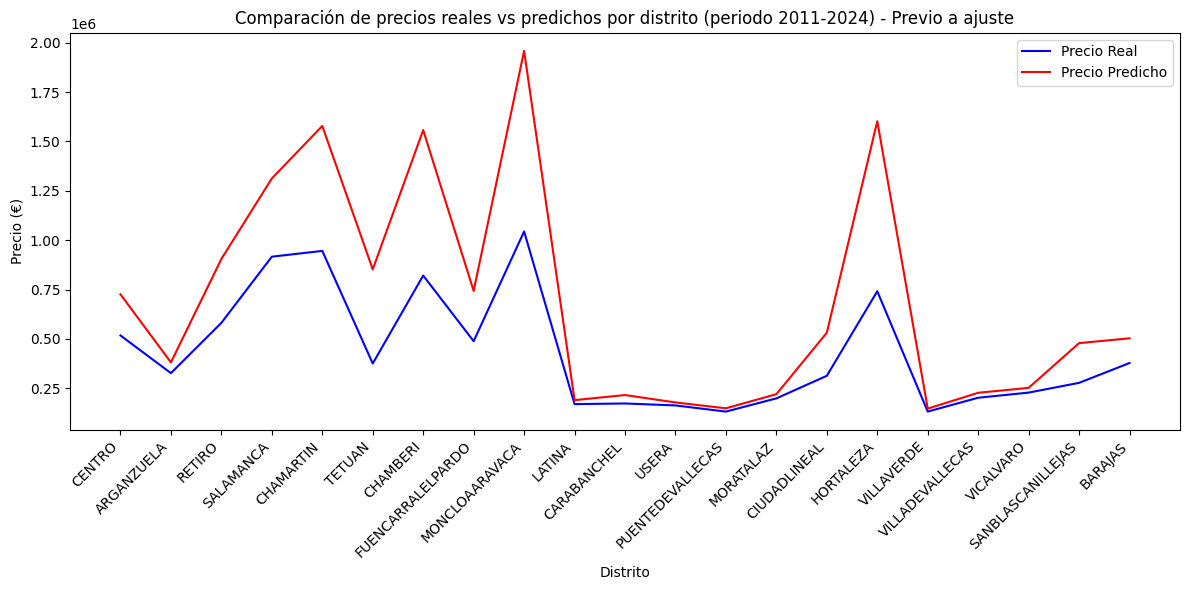

In [37]:
plt.figure(figsize=(12, 6))

# Reindex both series to maintain consistent district order
mean_real = df[df['Operacion'] == 'venta'].groupby('Distrito').agg(
    precio_completo=('Precio_venta', lambda x: (x * df.loc[x.index, 'Tamano']).mean())
).reindex(distritos)
mean_predicted = df[df['Operacion'] == 'venta'].groupby('Distrito')['Precio_predicho'].mean().reindex(distritos)

# Plot de ambos
plt.plot(mean_real.index, mean_real['precio_completo'], 'b-', label='Precio Real')
plt.plot(mean_predicted.index, mean_predicted.values, 'r-', label='Precio Predicho')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Distrito')
plt.ylabel('Precio (€)')
plt.title('Comparación de precios reales vs predichos por distrito (periodo 2011-2024) - Previo a ajuste')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/figures/precio_venta_real_vs_predicho_previo.png', dpi=300)
plt.show()

Los valores están en algunos distritos muy por encima de los reales (por ejemplo, en Chamartín o en Moncloa-Aravaca). En otros, como en Latina, Usera o Villaverde, apenas hay diferencia de la media entre los precios reales y los predichos.